In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt

import spec_decomposition
import RK4
from evolution_eq import evolution, ev_param

In [ ]:
x = np.linspace(0, 5, 100)
s = spec_decomposition.spec_decom(1, 100)

# for i in s.func_SBN(4):
#     print(str(i), end=",")

plt.plot(x, s.func_SBN_ddr(5), label="y'' ana")
plt.plot(x[1:-1], RK4.deriv_2(s.func_SBN(5), x[1]-x[0]), label="y'' num")

plt.legend(loc="best")
plt.show()

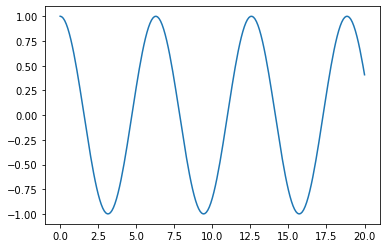

In [3]:
def f(u, t):
    return np.array([u[1], -u[0]])

u = np.array([1, 0])
u_list = [u[0]]
t = 0
t_list = [t]
dt = 0.1
while t < 20:
    u = RK4.RK4_step(t, u, dt, f)
    u_list.append(u[0])
    t += dt
    t_list.append(t)

plt.plot(t_list, u_list)
plt.show()

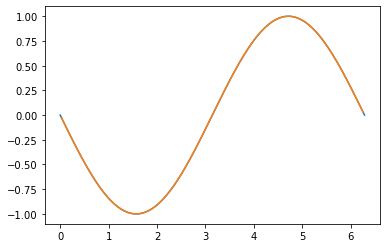

In [4]:
x = np.linspace(0, 2*np.pi, 200)
dx = x[1] - x[0]
y = np.sin(x)
y_p_a = np.cos(x)
y_pp_a = -np.sin(x)

y_p = RK4.deriv(y, dx)
y_pp = RK4.deriv_2(y, dx)

plt.plot(x, y_pp_a)
plt.plot(x[1:-1], y_pp)
plt.show()

In [14]:
s = input()
s = s.split()

for i in s:
    print("        " + i + " = self." + i)

        K_dr = self.K_dr
        A_t_rr_dr = self.A_t_rr_dr
        A = self.A
        A_t_rr = self.A_t_rr
        psi = self.psi
        psi_dr = self.psi_dr
        A_dr = self.A_dr
        B = self.B
        B_dr = self.B_dr
        A_t_tt = self.A_t_tt
        r = self.r


In [4]:
# TODO: test if modes of 0 really are 0
u = ev_param(1, 2, 3, 4, 5, 6)
u = 1 * u
print(u.alpha)
print(u.K)
print(u.A)
print(u.B)
print(u.A_a)
print(u.chi)

1
2
3
4
5
6


In [12]:
N = 320
L0 = 30
sd = spec_decomposition.spec_decom(L0, N)

n_k = np.pi * np.arange(1., N+2) / (2*N + 2)

f = 1.5*np.exp(- 3*(sd.r_k - 5)**2)

integral = L0*np.pi / (2*N+2) * np.sum((f / np.sin(n_k)**2)[1:-1])
print(integral)
print("From " + str(sd.r_k[-1]) + " to " + str(sd.r_k[0]))

1.5349900619197363
From 1.83697019872103e-15 to 6130.599473348943


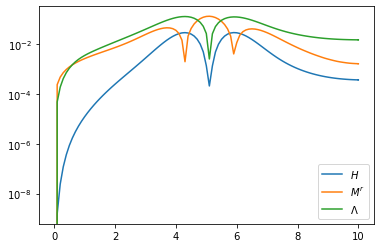

In [17]:
data = np.genfromtxt("../out/constraints_N=250_L0=30_T=0to10_dt=5e-4.txt")[:, 1:]
plt.plot(data[0], data[1], label=r"$H$")
plt.plot(data[0], data[2], label=r"$M^r$")
plt.plot(data[0], data[3], label=r"$\Lambda$")
plt.yscale("log")
plt.legend()
plt.show()